In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('../import/FimaNfipClaims.csv')


/var/folders/2y/d764fpq92556cl5v0l2kjn0r0000gn/T/ipykernel_21478/1039580462.py:1: DtypeWarning: Columns (7,25,32,35,38,42,47,51,52,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../import/FimaNfipClaims.csv')


In [94]:
df = df[df.state == 'TX']

In [ ]:
print(df.dtypes)

In [95]:
df = df[['dateOfLoss' , 'reportedZipCode', 'state', 'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim', 'amountPaidOnIncreasedCostOfComplianceClaim']]
df['totalAmountPaid'] = (df['amountPaidOnBuildingClaim'] + df['amountPaidOnContentsClaim'] )
df.dropna(subset=['totalAmountPaid'], inplace=True)

In [96]:
print(df.describe())

       reportedZipCode  amountPaidOnBuildingClaim  amountPaidOnContentsClaim  \
count    312921.000000               3.167950e+05              316795.000000   
mean      77417.556019               4.188443e+04               12343.818926   
std         590.534683               6.452922e+04               26478.814815   
min       11111.000000              -1.622185e+05              -41276.320000   
25%       77076.000000               3.754660e+03                   0.000000   
50%       77503.000000               1.730051e+04                1115.800000   
75%       77586.000000               5.516493e+04               12520.780000   
max       96799.000000               8.973270e+06              500000.000000   

       amountPaidOnIncreasedCostOfComplianceClaim  totalAmountPaid  
count                                316795.00000     3.167950e+05  
mean                                    183.69926     5.422825e+04  
std                                    2113.98777     8.206323e+04  
min

In [97]:
print(df['totalAmountPaid'].describe())
print(df['totalAmountPaid'].nunique())
print(df.head())

df.set_index('dateOfLoss', inplace=True)
df = df.sort_index()  
df.to_csv("../data/processed_fima_nfip_claims.csv", index=True) 

count    3.167950e+05
mean     5.422825e+04
std      8.206323e+04
min     -1.547985e+05
25%      5.002245e+03
50%      2.167881e+04
75%      7.000000e+04
max      9.023558e+06
Name: totalAmountPaid, dtype: float64
278912
                       dateOfLoss  reportedZipCode state  \
2163583  2021-05-17T00:00:00.000Z          75951.0    TX   
2163584  2017-08-26T00:00:00.000Z          77485.0    TX   
2163585  2019-06-06T00:00:00.000Z          77485.0    TX   
2163586  2016-04-18T00:00:00.000Z          77065.0    TX   
2163587  2017-08-28T00:00:00.000Z          77302.0    TX   

         amountPaidOnBuildingClaim  amountPaidOnContentsClaim  \
2163583                   16900.00                    6300.00   
2163584                   97072.36                       0.00   
2163585                   20089.07                       0.00   
2163586                   44131.65                   25777.94   
2163587                   98905.48                    4154.29   

         amountPaidOnIncrea

In [98]:
print(df.dtypes)

reportedZipCode                               float64
state                                          object
amountPaidOnBuildingClaim                     float64
amountPaidOnContentsClaim                     float64
amountPaidOnIncreasedCostOfComplianceClaim    float64
totalAmountPaid                               float64
dtype: object


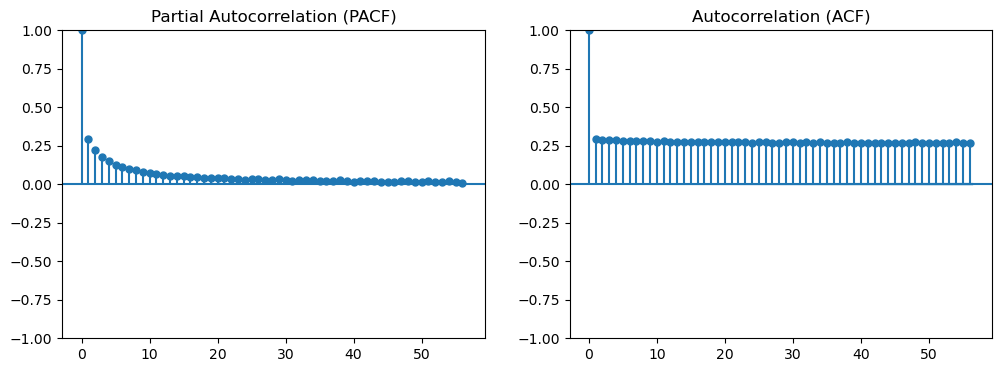

In [99]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_pacf(df['totalAmountPaid'], ax=axes[0])
axes[0].set_title('Partial Autocorrelation (PACF)')
plot_acf(df['totalAmountPaid'], ax=axes[1])
axes[1].set_title('Autocorrelation (ACF)')
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/2y/d764fpq92556cl5v0l2kjn0r0000gn/T/ipykernel_21478/2050730403.py:5: SyntaxWarning: invalid escape sequence '\s'
  oni_df = pd.read_csv(oni_url, sep='\s+', skiprows=1, header=None, names=['SEAS', 'YR', 'TOTAL', 'ANOM'])


SEAS      object
YR         int64
TOTAL    float64
ANOM     float64
dtype: object
  SEAS    YR  TOTAL  ANOM
0  DJF  1950  24.72 -1.53
1  JFM  1950  25.17 -1.34
2  FMA  1950  25.75 -1.16
3  MAM  1950  26.12 -1.18
4  AMJ  1950  26.32 -1.07


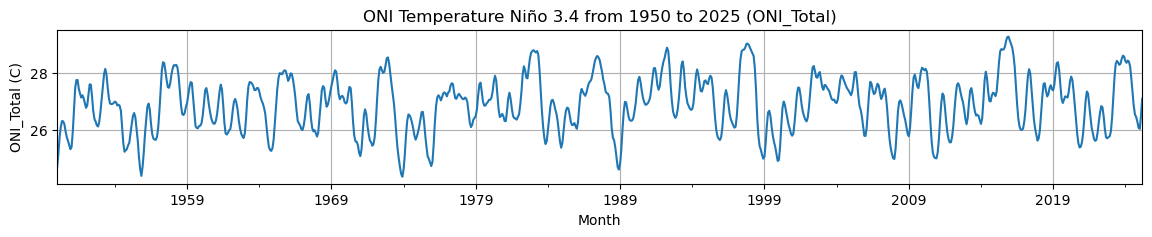

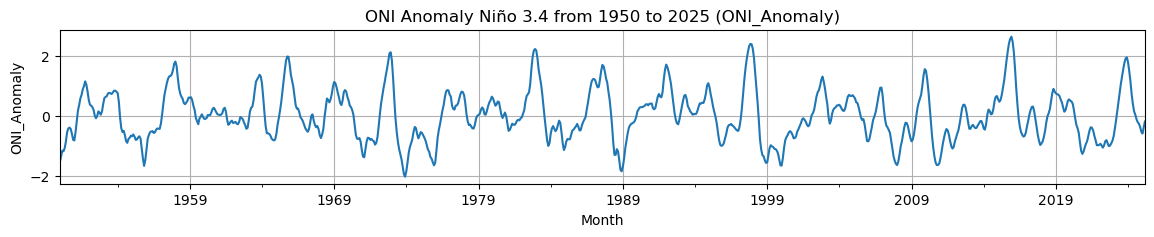

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

oni_url = "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
oni_df = pd.read_csv(oni_url, sep='\s+', skiprows=1, header=None, names=['SEAS', 'YR', 'TOTAL', 'ANOM'])
print(oni_df.dtypes)
print(oni_df.head())

season_to_month = {
    'DJF': 'Jan',
    'JFM': 'Feb',
    'FMA': 'Mar',
    'MAM': 'Apr',
    'AMJ': 'May',
    'MJJ': 'Jun',
    'JJA': 'Jul',
    'JAS': 'Aug',
    'ASO': 'Sep',
    'SON': 'Oct',
    'OND': 'Nov',
    'NDJ': 'Dec'
}

monthly_data = []

# seasonal to monthly conversion
for _, row in oni_df.iterrows():
    season = row['SEAS']
    year = row['YR']
    total = row['TOTAL']
    anomaly = row['ANOM']

    if season in season_to_month:
        month = season_to_month[season]
        date = pd.to_datetime(f"{year}-{month}-01", format="%Y-%b-%d")
        monthly_data.append({'Date': date, 'ONI_Total': total , 'ONI_Anomaly': anomaly})

monthly_oni_df = pd.DataFrame(monthly_data)
monthly_oni_df = monthly_oni_df.sort_values(by='Date')
monthly_oni_df = monthly_oni_df.drop_duplicates(subset='Date', keep='last')
monthly_oni_df.set_index('Date', inplace=True)
oni_data = monthly_oni_df
monthly_oni_df.to_csv("../data/processed_oni_data.csv")

plt.figure(figsize=(14, 2))
monthly_oni_df['ONI_Total'].plot(kind='line', title='ONI Temperature Niño 3.4 from 1950 to 2025 (ONI_Total)')
plt.xlabel('Month')
plt.ylabel('ONI_Total (C)')
plt.grid()
plt.show()

plt.figure(figsize=(14, 2))
monthly_oni_df['ONI_Anomaly'].plot(kind='line', title='ONI Anomaly Niño 3.4 from 1950 to 2025 (ONI_Anomaly)')
plt.xlabel('Month')
plt.ylabel('ONI_Anomaly')
plt.grid()
plt.show()

In [111]:
oni_data = pd.read_csv("../data/processed_oni_data.csv", parse_dates=['Date'])

In [112]:
oni_data['Date'] = pd.to_datetime(oni_data['Date'])
oni_data = oni_data.sort_values(by='Date')
oni_data = oni_data.drop_duplicates(subset='Date', keep='first')
oni_data = oni_data.set_index('Date')
oni_data.index = oni_data.index + pd.DateOffset(months=1)
oni_data_daily = oni_data.resample('D').ffill()
oni_data_daily = oni_data_daily[oni_data_daily.index >= '1978-01-09']

print(oni_data_daily.head())
print(oni_data_daily.describe())


            ONI_Total  ONI_Anomaly
Date                              
1978-01-09      27.21         0.79
1978-01-10      27.21         0.79
1978-01-11      27.21         0.79
1978-01-12      27.21         0.79
1978-01-13      27.21         0.79
          ONI_Total   ONI_Anomaly
count  17250.000000  17250.000000
mean      27.036052      0.020369
std        0.939650      0.846380
min       24.630000     -1.850000
25%       26.380000     -0.540000
50%       27.060000     -0.070000
75%       27.660000      0.490000
max       29.260000      2.640000


In [126]:
import pandas as pd

url = "https://www2.census.gov/programs-surveys/decennial/2020/data/apportionment/apportionment.csv"
df = pd.read_csv(
    url,
    dtype={
        'Name': str,
        'Year': str,
        'Resident Population': float,
    },
    na_values=[''],
    thousands=','
)

texas_data = df[df['Name'] == 'Texas'].copy()
texas_data['Year'] = pd.to_datetime(texas_data['Year'], format='%Y')
texas_data = texas_data.set_index('Year')
texas_data.to_csv('processed_texas_population_fetch.csv')

In [127]:
population_data = pd.read_csv("processed_texas_population_fetch.csv")
print(population_data.head())

         Year   Name Geography Type  Resident Population  \
0  1910-01-01  Texas          State            3896542.0   
1  1920-01-01  Texas          State            4663228.0   
2  1930-01-01  Texas          State            5824715.0   
3  1940-01-01  Texas          State            6414824.0   
4  1950-01-01  Texas          State            7711194.0   

   Percent Change in Resident Population  Resident Population Density  \
0                                   27.8                         14.9   
1                                   19.7                         17.9   
2                                   24.9                         22.3   
3                                   10.1                         24.6   
4                                   20.2                         29.5   

   Resident Population Density Rank  Number of Representatives  \
0                              39.0                       18.0   
1                              39.0                       18.0   
2 

In [128]:
population_data = population_data[['Year', 'Resident Population', 'Resident Population Density']]

In [129]:
print(population_data.head())
population_data.set_index('Year')
print(population_data['Resident Population'].info)

         Year  Resident Population  Resident Population Density
0  1910-01-01            3896542.0                         14.9
1  1920-01-01            4663228.0                         17.9
2  1930-01-01            5824715.0                         22.3
3  1940-01-01            6414824.0                         24.6
4  1950-01-01            7711194.0                         29.5
<bound method Series.info of 0      3896542.0
1      4663228.0
2      5824715.0
3      6414824.0
4      7711194.0
5      9579677.0
6     11196730.0
7     14229191.0
8     16986510.0
9     20851820.0
10    25145561.0
11    29145505.0
Name: Resident Population, dtype: float64>


In [130]:
print(population_data.dtypes)
population_data = population_data.drop(columns=['Resident Population Density'])
print(population_data)

Year                            object
Resident Population            float64
Resident Population Density    float64
dtype: object
          Year  Resident Population
0   1910-01-01            3896542.0
1   1920-01-01            4663228.0
2   1930-01-01            5824715.0
3   1940-01-01            6414824.0
4   1950-01-01            7711194.0
5   1960-01-01            9579677.0
6   1970-01-01           11196730.0
7   1980-01-01           14229191.0
8   1990-01-01           16986510.0
9   2000-01-01           20851820.0
10  2010-01-01           25145561.0
11  2020-01-01           29145505.0


In [131]:
import pandas as pd
# Import the Vintage 2024 Estimate as Value for 2025 31,290,831 
new_row = pd.DataFrame([{
    'Year': '2025-01-01',
    'Resident Population': 31290831.0,
}])

population_data = pd.concat([population_data, new_row], ignore_index=True)
population_data['Year'] = pd.to_datetime(population_data['Year'])
print(population_data.tail())

         Year  Resident Population
8  1990-01-01           16986510.0
9  2000-01-01           20851820.0
10 2010-01-01           25145561.0
11 2020-01-01           29145505.0
12 2025-01-01           31290831.0


In [132]:
population_data['Year'] = pd.to_datetime(population_data['Year'])
population_data = population_data.set_index('Year')
population_data_daily = population_data.resample('D').asfreq()
population_data_daily['Resident Population'] = population_data_daily['Resident Population'].interpolate(method='linear')

print(population_data_daily.head())
print(population_data_daily.tail())
print(population_data_daily)

            Resident Population
Year                           
1910-01-01         3.896542e+06
1910-01-02         3.896752e+06
1910-01-03         3.896962e+06
1910-01-04         3.897172e+06
1910-01-05         3.897382e+06
            Resident Population
Year                           
2024-12-28         3.128613e+07
2024-12-29         3.128731e+07
2024-12-30         3.128848e+07
2024-12-31         3.128966e+07
2025-01-01         3.129083e+07
            Resident Population
Year                           
1910-01-01         3.896542e+06
1910-01-02         3.896752e+06
1910-01-03         3.896962e+06
1910-01-04         3.897172e+06
1910-01-05         3.897382e+06
...                         ...
2024-12-28         3.128613e+07
2024-12-29         3.128731e+07
2024-12-30         3.128848e+07
2024-12-31         3.128966e+07
2025-01-01         3.129083e+07

[42005 rows x 1 columns]


In [133]:
population_data_daily = population_data_daily[population_data_daily.index >= '1978-01-09']

In [134]:
population_data_daily.to_csv("../data/processed_texas_population_daily.csv")